In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [273]:
data = pd.read_csv("Telco_Customer_Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [274]:
data.shape

(7043, 21)

In [275]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [277]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors= 'coerce')

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [279]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [280]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [281]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [282]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [283]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [284]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4845,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),39.40,825.40,No
1193,5232-NXPAY,Female,0,No,No,47,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,74.45,3510.30,No
5929,5828-DWPIL,Male,1,Yes,No,62,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,89.10,5618.30,No
1035,1767-CJKBA,Male,0,No,No,66,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.10,1697.70,No
6926,1450-SKCVI,Female,0,No,No,56,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.85,4092.85,Yes
2869,2672-HUYVI,Female,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.10,455.30,Yes
2552,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,26.90,1250.85,No
4787,5542-DHSXL,Female,0,Yes,No,4,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,54.70,235.05,No
4425,3059-NGMXB,Male,0,Yes,Yes,14,Yes,Yes,DSL,Yes,...,No,No,No,Yes,Month-to-month,No,Mailed check,69.20,944.65,No
3495,4988-IQIGL,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.35,75.35,Yes


In [285]:
data['TotalCharges'].fillna(value = data['tenure']*data['MonthlyCharges'], inplace= True)

In [286]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

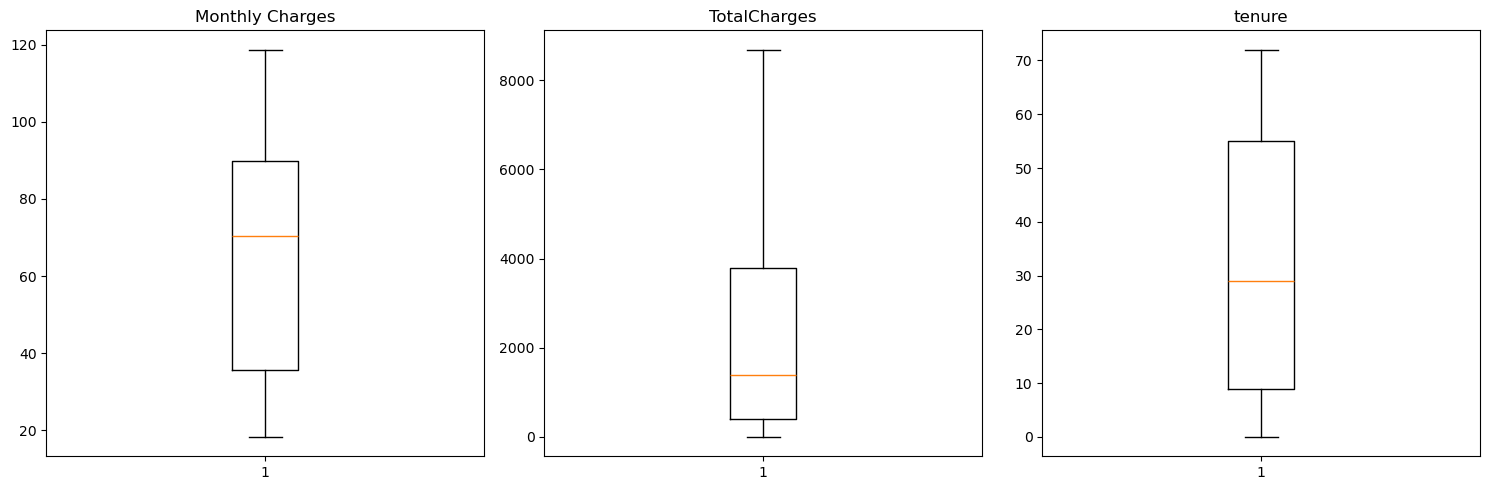

In [287]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].boxplot(data['MonthlyCharges'])
axs[0].set_title('Monthly Charges')

axs[1].boxplot(data['TotalCharges'])
axs[1].set_title('TotalCharges')

axs[2].boxplot(data['tenure'])
axs[2].set_title('tenure')

plt.tight_layout()
plt.show()

# EDA

In [288]:
data.duplicated().sum()

0

In [289]:
# Removing CoustomerId
data.drop(columns='customerID', inplace= True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [290]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [291]:
column_yesno = ['gender', 'Partner', 'Dependents', 
       'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn', 'InternetService', 'PaymentMethod']

In [292]:
data_changed = pd.get_dummies(data, columns= column_yesno, dtype=int)
data_changed.head()

,SeniorCitizen,tenure,MultipleLines,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaperlessBilling_Yes,Churn_No,Churn_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,No phone service,Month-to-month,29.85,29.85,1,0,0,1,...,1,1,0,1,0,0,0,0,1,0
1,0,34,No,One year,56.95,1889.50,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
2,0,2,No,Month-to-month,53.85,108.15,0,1,1,0,...,1,0,1,1,0,0,0,0,0,1
3,0,45,No phone service,One year,42.30,1840.75,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
4,0,2,No,Month-to-month,70.70,151.65,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0


In [293]:
from sklearn.preprocessing import OrdinalEncoder

MultipleLines_order = ['No phone service', 'No', 'Yes']
Contract_order = ['Month-to-month', 'One year', 'Two year']

# Create an OrdinalEncoder with defined categories for each column
encoder = OrdinalEncoder(categories=[MultipleLines_order, Contract_order])

# Apply ordinal encoding to the specified columns
data_changed[['MultipleLines', 'Contract']] = encoder.fit_transform(data_changed[['MultipleLines', 'Contract']])

# Display the transformed DataFrame
data_changed.head()



,SeniorCitizen,tenure,MultipleLines,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaperlessBilling_Yes,Churn_No,Churn_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0.0,0.0,29.85,29.85,1,0,0,1,...,1,1,0,1,0,0,0,0,1,0
1,0,34,1.0,1.0,56.95,1889.50,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
2,0,2,1.0,0.0,53.85,108.15,0,1,1,0,...,1,0,1,1,0,0,0,0,0,1
3,0,45,0.0,1.0,42.30,1840.75,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
4,0,2,1.0,0.0,70.70,151.65,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0


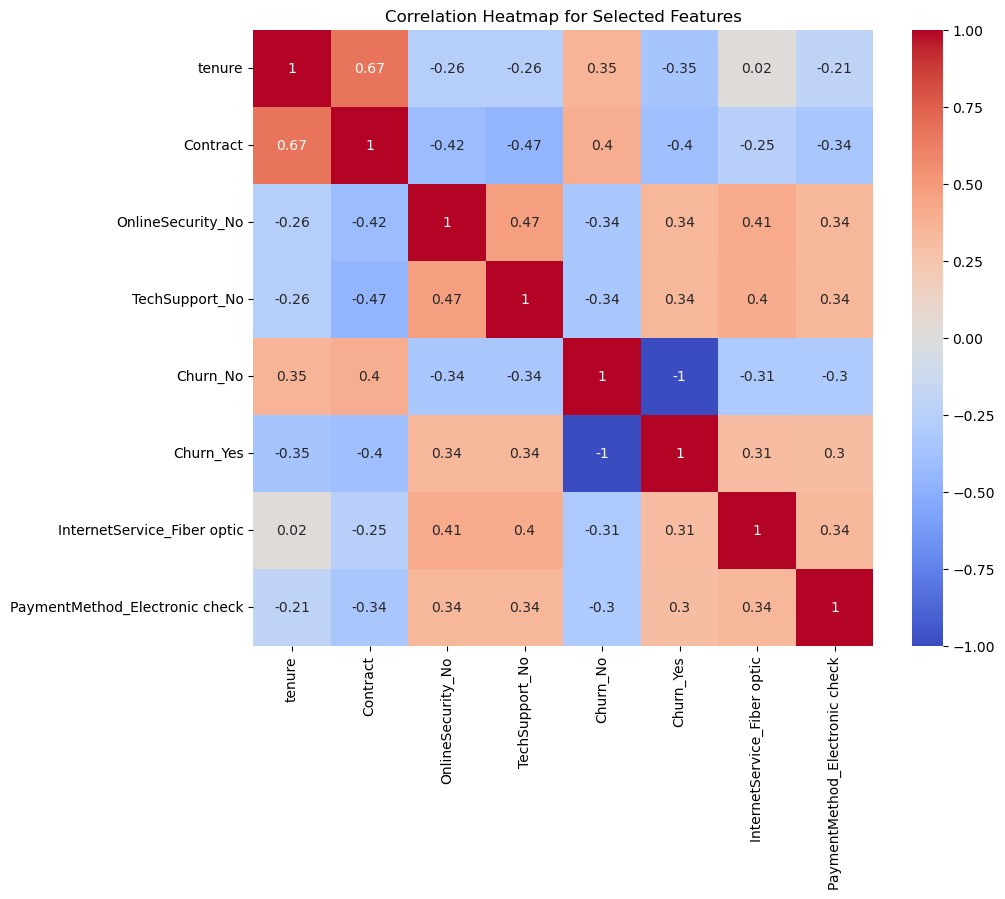

Selected columns and their correlations with Churn:
tenure                            0.352229
Contract                          0.396713
OnlineSecurity_No                -0.342637
TechSupport_No                   -0.337281
Churn_No                          1.000000
Churn_Yes                        -1.000000
InternetService_Fiber optic      -0.308020
PaymentMethod_Electronic check   -0.301919
Name: Churn_No, dtype: float64


In [294]:
# Assuming 'data_changed' is your DataFrame
core = data_changed.corr()

# Extract the correlation values for the 'Churn' column
churn_correlation = core['Churn_No']

# Select columns with correlation values between -1 and -0.3 or between 0.3 and 1
selected_columns = churn_correlation[(churn_correlation <= -0.3) | (churn_correlation >= 0.3)]

# Create a new DataFrame with the selected columns
selected_data = data_changed[selected_columns.index]

# Plotting the heatmap for the selected columns
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

# Display the selected columns and their correlations
print("Selected columns and their correlations with Churn:")
print(selected_columns)

In [295]:
selected_columns = selected_columns.index
print(selected_columns)

Index(['tenure', 'Contract', 'OnlineSecurity_No', 'TechSupport_No', 'Churn_No',
       'Churn_Yes', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [296]:
all_columns = data_changed.columns

remove_col = all_columns.difference(selected_columns)

data_changed.drop(columns= remove_col, axis= 1, inplace= True)

data_changed.head()

,tenure,Contract,OnlineSecurity_No,TechSupport_No,Churn_No,Churn_Yes,InternetService_Fiber optic,PaymentMethod_Electronic check
0,1,0.0,1,1,1,0,0,1
1,34,1.0,0,1,1,0,0,0
2,2,0.0,0,1,0,1,0,0
3,45,1.0,0,0,1,0,0,0
4,2,0.0,1,1,0,1,1,1


In [297]:
data_changed.drop(columns= 'Churn_No', axis= 1, inplace= True)

In [298]:
X = data_changed.drop('Churn_Yes', axis= 1)
y = data_changed['Churn_Yes']
X.head()

,tenure,Contract,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check
0,1,0.0,1,1,0,1
1,34,1.0,0,1,0,0
2,2,0.0,0,1,0,0
3,45,1.0,0,0,0,0
4,2,0.0,1,1,1,1


In [310]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 101)
X_train.shape, y_train.shape

((4930, 6), (4930,))

In [311]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [312]:
accuracy_LR = accuracy_score(y_pred_LR, y_test)
accuracy_LR

0.8002839564600095

In [313]:
Model_SVC = SVC()
Model_SVC.fit(X_train, y_train)

y_pred_svc = Model_SVC.predict(X_test)

accuracy_SVC = accuracy_score(y_pred_svc, y_test)
accuracy_SVC

0.7893989588263133

In [315]:
model_Rf = RandomForestClassifier(n_estimators=1000)
model_Rf.fit(X_train, y_train)

y_pred_Rf = model_Rf.predict(X_test)

accuracy_Rf = accuracy_score(y_pred_Rf, y_test)
accuracy_Rf

0.7652626597255088

In [304]:
from joblib import dump
dump(model_LR, "LR_model.joblib")

['LR_model.joblib']